## Baseline
Это базовое решение или шаблон решения задачи 
на котором вы можете основывать свое решение

Подготовил: <b>Lek</b> <br/>
Slack: @Lek <br/>
telegram: @AlexLekov <br/>

# Домашние задание по уроку 3 (SkillFactory)

#### Описание задания

Коллеги подготовили для вас домашнее задание на классификацию. В рамках задания вам предлагается решить задачу и сразиться между собой в качестве. Задача на предсказание: согласится ли клиент на депозит. Найти задание можно по ссылке (для участия нужна регистрация на kaggle.com)

#### Нужно решить задачу с помощью 3х методов:
* кнн
* дерева принятия решения
* логистической регрессии
* и залить, на ваш взгляд, лучшее решение.

Это командное ДЗ, его нужно выполнить совместно с вашими коллегами. Коммит делается от одного выбранного участника. 
#### Для зачета нужно:
* предоставить ноутбук с кодом, где вы попробовали все 3 метода
* залить предсказания для теста и найти себя в лидерборде

Команда, занявшая 1 место, получит дополнительный балл. 

Метрика качества ROC-AUC.

#### Порядок сдачи

Вовремя сделайте коммит на Kaggle, чтобы попасть в лидерборд. Не забудьте внутри ноутбука указать номер и состав команды.

#### PS:
Обсудить урок и домашнее задание можно в нашем Slack-чате на канале #lesson04

# Поехали!

![title](img/start.jpg)

# 1. Подгрузка данных

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [12]:
df_train = pd.read_csv('data/train.csv', encoding='utf8')

In [13]:
df_train.head(10)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0
5,3c41d96da147ab5a745938cbd85e2313,56,self-employed,single,basic.9y,unknown,no,no,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
6,1a87845e9d5740a2619acd478da08459,33,admin.,married,university.degree,no,yes,yes,cellular,may,...,2,999,0,nonexistent,-1.8,93.876,-40.0,0.685,5008.7,0
7,e07d393a5d9b174b39f6064823386759,36,management,married,university.degree,no,yes,no,cellular,nov,...,1,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,0
8,e5a3da407a75e8475a3e1bb6a804b1c7,70,retired,married,professional.course,no,no,no,cellular,oct,...,1,6,3,success,-1.1,94.601,-49.5,0.987,4963.6,1
9,42b112272cd4851b4d65d1ed464fbbd9,32,blue-collar,married,professional.course,unknown,yes,no,cellular,may,...,2,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,0


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

### Описание столбцов

* _id - идентификатор человека
* age - возраст
* job - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-* employed","services","student","technician","unemployed","unknown")
* marital - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
* education - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default - есть ли дефолт по кредиту ("no","yes","unknown")
* housing - есть ли кредит на жилье ("no","yes","unknown")
* loan - есть ли персональный кредит ("no","yes","unknown")
* contact - контактный тип связи ("cellular","telephone")
* month - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")
* day_of_week - последний контактный день недели ("mon","tue","wed","thu","fri")
* duration - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.
* campaign - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)
* pdays - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)
* previous - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента
* poutcome - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")

#### ниже приведены показатели окружающей среды и банка
* emp.var.rate - изменение уровня занятости (квартальный показатель)
* cons.price.idx - индекс потребительских цен (ежемесячный показатель)
* cons.conf.idx - индекс доверия потребителя (ежемесячный показатель)
* euribor3m - курс Euribor (ежедневный показатель)
* nr.employed - количество сотрудников (квартальный показатель)
* target - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)



# 2. Анализ данных

![title](img/data.png)

In [15]:
# тут ваш код для анализа данных
# Как Пример:

In [16]:
for colum in df_train.columns:
    print(len(df_train[colum].value_counts()), colum)

24712 _id
77 age
12 job
4 marital
8 education
3 default
3 housing
3 loan
2 contact
10 month
5 day_of_week
1384 duration
40 campaign
26 pdays
7 previous
3 poutcome
10 emp.var.rate
26 cons.price.idx
26 cons.conf.idx
306 euribor3m
11 nr.employed
2 target


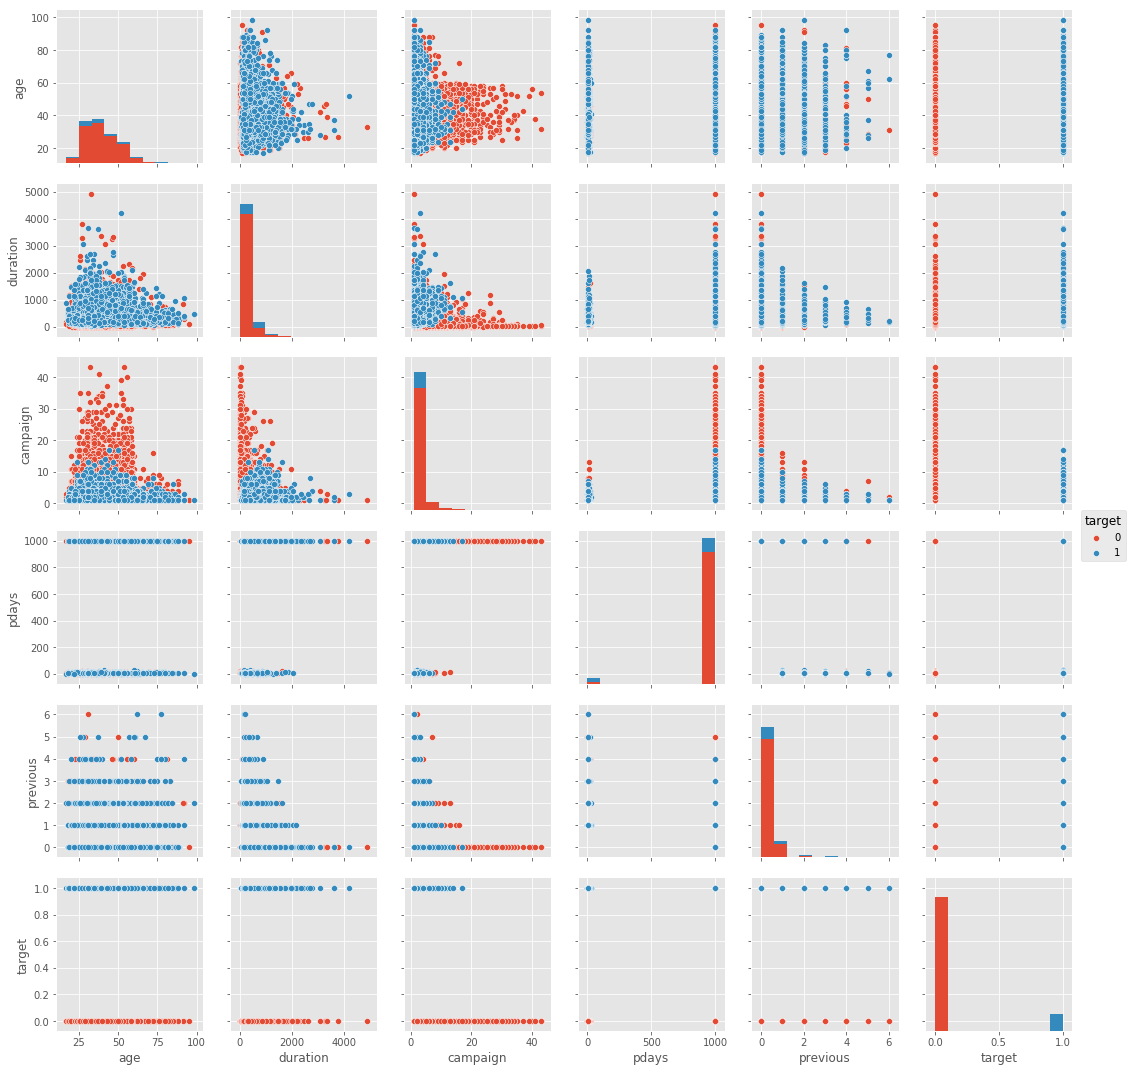

In [17]:
import seaborn as sns
sns.pairplot(df_train[['age','duration','campaign','pdays','previous', 'target']],hue='target')

# 3. Функция обработки данных

![title](img/clearcode.png)

In [28]:
def preproc_data(df_input):
    df_output = df_input.copy()
    # ################### 1. Предобработка ###################################### 
    # 1.1 Удаляем столбец _id - идентификатор человека
    df_output.drop('_id', axis = 1, inplace = True)
    
    # ......... Тут ваш код предобработки признаков ............ #
    
    # Например:
    # ############## N. One hot encoding ##########################################
    encoding_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output = pd.get_dummies(df_output, columns=encoding_columns,)
    
    
    return df_output

In [29]:
df_train_preproc = preproc_data(df_train)
y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 63 columns):
age                              24712 non-null int64
duration                         24712 non-null int64
campaign                         24712 non-null int64
pdays                            24712 non-null int64
previous                         24712 non-null int64
emp.var.rate                     24712 non-null float64
cons.price.idx                   24712 non-null float64
cons.conf.idx                    24712 non-null float64
euribor3m                        24712 non-null float64
nr.employed                      24712 non-null float64
job_admin.                       24712 non-null uint8
job_blue-collar                  24712 non-null uint8
job_entrepreneur                 24712 non-null uint8
job_housemaid                    24712 non-null uint8
job_management                   24712 non-null uint8
job_retired                      24712 non-null uint8
job_self-employed

# 4. ML

In [141]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV

### 4.0 Делаем себе отложеную выборку чтоб не переоптиться

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17298, 63), (17298,), (7414, 63), (7414,))

чтоб избежать вот такого:
![title](img/of.jpg)

### 4.1 KNN

In [77]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)  

In [78]:
print('KNN: ', cross_val_score(KNeighborsClassifier(),
                               X_scaled, y_train, scoring='roc_auc',cv = 10, ).mean())

KNN:  0.7782746026852048


### 4.2 DecisionTree

In [79]:
print('DecisionTree: ', cross_val_score(DecisionTreeClassifier(random_state=42),
                                        X_train, y_train, scoring='roc_auc', cv = 10, ).mean())

DecisionTree:  0.7326508351103126


In [80]:
# Не совсем DecisionTree, но близко ;)
print('RandomForest: ', cross_val_score(RandomForestClassifier(random_state=42),
                                        X_train, y_train, scoring='roc_auc', cv = 10, ).mean())

RandomForest:  0.9096100119874796


### 4.3 LogisticRegression

In [81]:
print('LogisticRegression: ', cross_val_score(LogisticRegression(random_state=42),
                                              X_train, y_train, scoring='roc_auc', cv = 10, ).mean())

LogisticRegression:  0.9297126591303263


## 5. Оптимизация гипер параметров
на примере GridSearchCV и LogisticRegression

![title](img/ml.png)

In [88]:
# Grid search cross validation
grid={"C":[0.2,0.5,1,2,5],
      "penalty":["l1","l2"]} # тут еще параметры можно добавить 

logreg_cv=GridSearchCV(LogisticRegression(random_state=42)
                       ,grid, cv=5, scoring='roc_auc', n_jobs=4, )

%time logreg_cv.fit(X_train,y_train) # %time просто для того чтоб вывести время обработки

CPU times: user 47.2 s, sys: 689 ms, total: 47.8 s
Wall time: 7min 33s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [0.2, 0.5, 1, 2, 5], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [92]:
print('Best Score:', logreg_cv.best_score_)
print('Best Penalty:', logreg_cv.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_cv.best_estimator_.get_params()['C'])

Best Score: 0.9310466935894128
Best Penalty: l1
Best C: 0.5


In [100]:
lr = LogisticRegression(C=(logreg_cv.best_estimator_.get_params()['C']),
                        penalty=(logreg_cv.best_estimator_.get_params()['penalty']),
                        random_state=42, )

# Смотрим  СV
print('Logreg CV: ', cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv = 10, ).mean()) # яб еще std посмотрел

Logreg CV:  0.931012233563426
Logreg Test AUC:  0.9344


In [144]:
# Смотрим  Test
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test)
print('Logreg Test' )
print('roc_auc: ', '\t', roc_auc_score(y_test, lr_predict_proba[:,1]))
print('accuracy: ', '\t', accuracy_score(y_test, lr_predict))
print('precision: ', '\t', precision_score(y_test, lr_predict))
print('recall: ', '\t', recall_score(y_test, lr_predict))

Logreg Test
roc_auc:  	 0.9344427047707556
accuracy:  	 0.9112489884003238
precision:  	 0.6789168278529981
recall:  	 0.41637010676156583


In [ ]:
# будем считать что тут выбрали лучшую модель

## 6. Готовим  df_test и отправляем на Kaggle

### 6.1. Подгружаем  df_test и делаем разбиение

In [101]:
df_test = pd.read_csv('data/test.csv', encoding='utf8')

In [102]:
df_test.info() # эти данные без столбца target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [148]:
df_test_preproc = preproc_data(df_test)

df_train_preproc = preproc_data(df_train)
y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

### 6.2. Обучаем модель и сохраняем предикты

In [149]:
lr

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# На всякий случай проверяем по CV
lr_cv=cross_val_score(lr, X, y, scoring='roc_auc', cv = 10, )
print('Logreg CV mean: ', lr_cv.mean())
print('Logreg CV std: ', lr_cv.std()) 

In [150]:
lr.fit(X, y)
lr_predict_proba = lr.predict_proba(df_test_preproc)

In [151]:
submission = pd.DataFrame(columns=['_id', 'predicted'],)
submission['_id'], submission['predicted'] = df_test._id.values, lr_predict_proba[:,1]

In [152]:
submission.head(10)

,_id,predicted
0,66810d8e6bf2b41c880a7bc6c8a1e295,0.062655
1,ccac3879652b08cb8b44c1920fd93afa,0.009617
2,fcccab4d7a76f70647f015f2c84c2af8,0.016366
3,ed8399278c30678dab739045fa12b440,0.038026
4,1d4d62ac5cabcb48bac7112813f290cb,0.020826
5,aba2dec4c5cab88824f36babd24b986f,0.169872
6,06f318f1dd178e738f675bb88a5adb84,0.008815
7,d5036f5956e42ee6207296238fc4bc1d,0.007992
8,fe0cc8933698ad4046ff2b82f65756eb,0.016535
9,70190122f4ebf196535e11b33eb95b81,0.010044


In [153]:
df_test.shape, submission.shape

((16476, 21), (16476, 2))

In [154]:
submission.to_csv('submission.csv', index=False)